In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import os

In [2]:
# ---- SETTINGS ----
symbol = "AAPL"
input_path = f"../data/{symbol}_clean.csv"
output_path = f"../data/{symbol}_with_anomalies.csv"

In [3]:
# ---- LOAD CLEAN DATA ----
df = pd.read_csv(input_path, index_col=0, parse_dates=True)
df.columns = df.columns.str.strip()  # clean any whitespace

In [4]:
# ---- SELECT FEATURES ----
features = ['Close', 'rolling_mean', 'rolling_std', 'z_score']
X = df[features]

In [5]:
# ---- TRAIN ISOLATION FOREST ----
model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(X)

In [6]:
# ---- INTERPRET: -1 = anomaly ----
df['anomaly_flag'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

In [7]:
# ---- SAVE OUTPUT ----
df.to_csv(output_path)

In [8]:
# ---- VERIFY SAVE ----
if os.path.exists(output_path):
    print(f"✅ Anomaly-labeled file saved: {output_path}")
else:
    print("❌ Failed to save output file")

✅ Anomaly-labeled file saved: ../data/AAPL_with_anomalies.csv


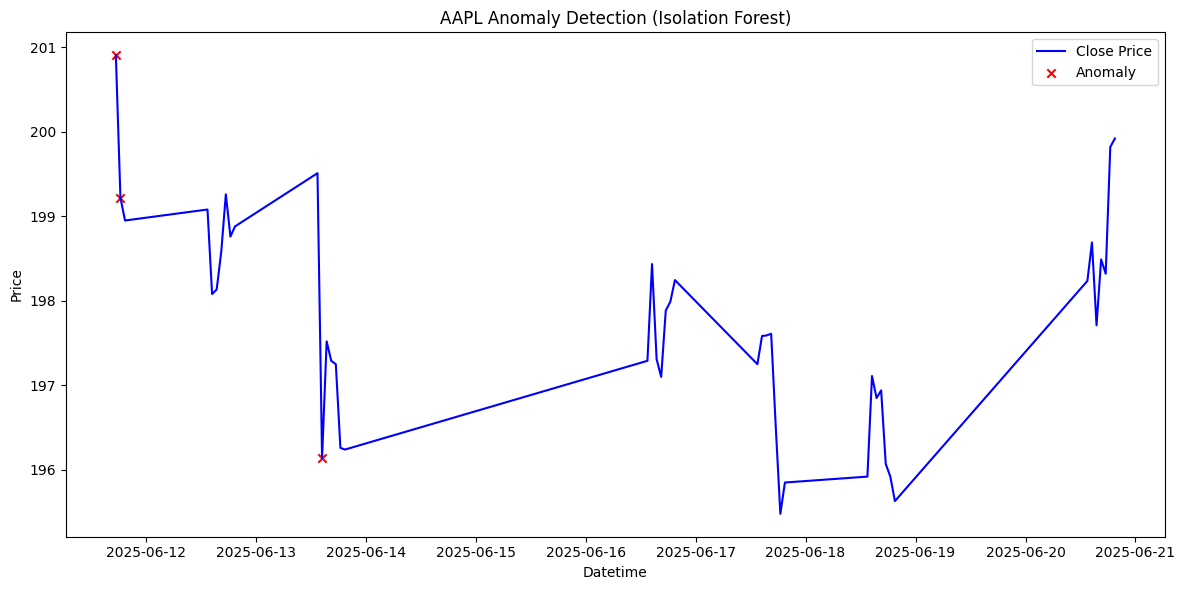

In [9]:
# ---- PLOT ANOMALIES ----
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.scatter(df.index[df['anomaly_flag'] == 1], df['Close'][df['anomaly_flag'] == 1],
            color='red', label='Anomaly', marker='x')
plt.title(f'{symbol} Anomaly Detection (Isolation Forest)')
plt.xlabel("Datetime")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()